In [1]:
"""
Double dot example
"""
import time
from functools import partial

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from qarray import (DotArray, charge_state_changes)

In [2]:
# setting up the constant capacitance model for a double dot. Where
# the plunger gates couple to their repsective dots with capacitance 1. and to the other dot
# with capacitance 0.1. And finally the interdot capacitance are 0.1 between the dots.
model = DotArray(
    Cdd=np.array([
        [0., 0.1],
        [0.1, 0.]
    ]),
    Cgd=np.array([
        [1., 0.2],
        [0.2, 1]
    ]),
    charge_carrier='h'  # setting the charge carrier to holes
)

In [3]:
# defining the scan parameters
x_min, x_max, x_res = -5, 5, 500
y_min, y_max, y_res = -5, 5, 500

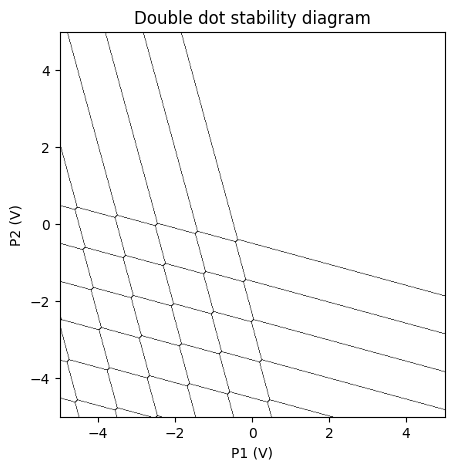

In [4]:
# sweeping the physical plunger gates P1 and P2

n_open = model.do2d_open(
    x_gate = 'P1', x_min = x_min, x_max = x_max, x_res = x_res, 
    y_gate = 'P2', y_min = y_min, y_max = y_max, y_res = y_res
)

# creating an array of boolean values indicating where the occupation changes
z_open = charge_state_changes(n_open)

# plotting the double dot stability diagram
plt.figure(figsize=(5, 5))
plt.imshow(z_open, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='Greys')
plt.xlabel('P1 (V)')
plt.ylabel('P2 (V)')
plt.title('Double dot stability diagram')
plt.show()


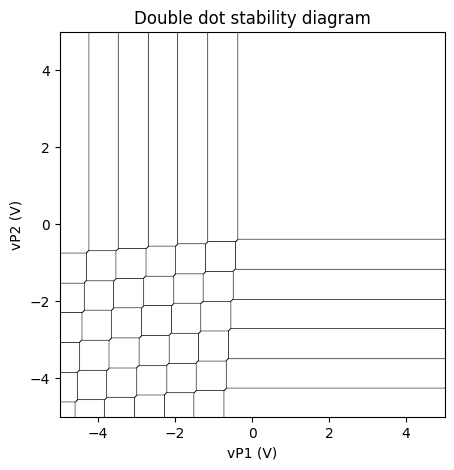

In [5]:
# sweeping the virtual plunger gates vP1 and vP2

n_open = model.do2d_open(
    x_gate = 'vP1', x_min = x_min, x_max = x_max, x_res = x_res, 
    y_gate = 'vP2', y_min = y_min, y_max = y_max, y_res = y_res
)

# creating an array of boolean values indicating where the occupation changes
z_open = charge_state_changes(n_open)

# plotting the double dot stability diagram
plt.figure(figsize=(5, 5))
plt.imshow(z_open, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='Greys')
plt.xlabel('vP1 (V)')
plt.ylabel('vP2 (V)')
plt.title('Double dot stability diagram')
plt.show()

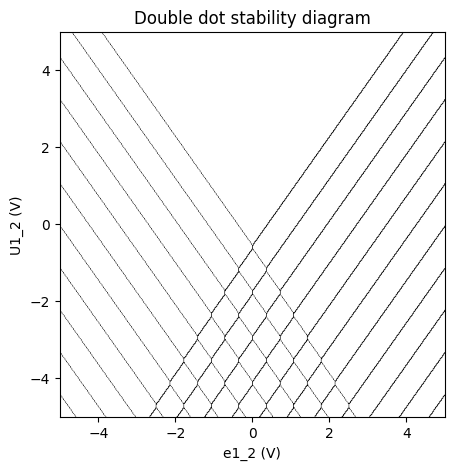

In [6]:
# sweeping the detuning and onsite energy

n_open = model.do2d_open(
    x_gate='e1_2', x_min=x_min, x_max=x_max, x_res=x_res,
    y_gate='U1_2', y_min=y_min, y_max=y_max, y_res=y_res
)

# creating an array of boolean values indicating where the occupation changes
z_open = charge_state_changes(n_open)

# plotting the double dot stability diagram
plt.figure(figsize=(5, 5))
plt.imshow(z_open, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='Greys')
plt.xlabel('e1_2 (V)')
plt.ylabel('U1_2 (V)')
plt.title('Double dot stability diagram')
plt.show()


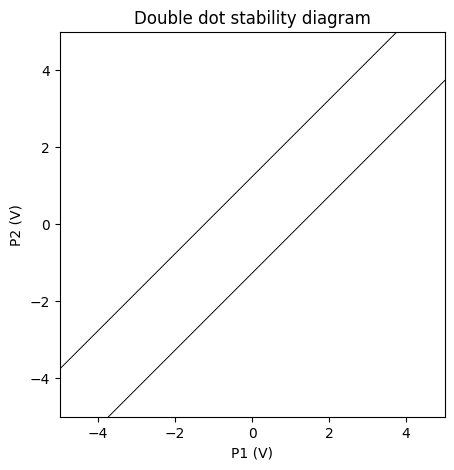

In [7]:
# simulating the charge stability diagram for a double dot in the isolated regime containing 2 holes

n_closed = model.do2d_closed(
    x_gate = 'P1', x_min = x_min, x_max = x_max, x_res = x_res, 
    y_gate = 'P2', y_min = y_min, y_max = y_max, y_res = y_res,
    n_charges = 2
)

# creating an array of boolean values indicating where the occupation changes
z_closed = charge_state_changes(n_closed)

# plotting the double dot stability diagram
plt.figure(figsize=(5, 5))
plt.imshow(z_closed, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='Greys')
plt.xlabel('P1 (V)')
plt.ylabel('P2 (V)')
plt.title('Double dot stability diagram')
plt.show()